In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



df = pd.read_csv("RankingT.csv")

print(df.shape)
print(df.head())
print(df.info())
print(df.describe())



(600, 5)
   id  id_filme  nota  posicao        data
0   1         1  10.0        1  2025-11-01
1   2        16   9.2        2  2025-11-01
2   3         6   9.0        3  2025-11-01
3   4        19   8.8        4  2025-11-01
4   5         4   8.8        5  2025-11-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        600 non-null    int64  
 1   id_filme  600 non-null    int64  
 2   nota      600 non-null    float64
 3   posicao   600 non-null    int64  
 4   data      600 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 23.6+ KB
None
               id    id_filme        nota     posicao
count  600.000000  600.000000  600.000000  600.000000
mean   300.500000   10.500000    5.583667   10.500000
std    173.349358    5.771093    2.463612    5.771093
min      1.000000    1.000000    0.000000    1.000000
25%    150.750000 

In [3]:
#verificação de valores nulos
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("\nValores nulos por coluna:\n", df.isnull().sum())


Valores nulos por coluna:
 id          0
id_filme    0
nota        0
posicao     0
data        0
dtype: int64


In [4]:
#pré-processamento:

#aqui ta ocorrendo o tratamento data, por se tratar de um dado categorico.

# 2. Converter a coluna 'data' para datetime ANTES de calcular o mínimo
df['data'] = pd.to_datetime(df['data'])
data_inicial = df['data'].min()
df['dias_desde_inicio'] = (df['data'] - data_inicial).dt.days




In [5]:
#definição target e feature
y=df['nota']
X=df[['posicao']]

In [6]:
#treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# 6. Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Previsões separadas para treino e teste
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

coeficiente = modelo.coef_[0]

In [8]:
print("\n>> RESULTADOS REGRESSÃO LINEAR - TREINO:")
print(f"R²: {r2_score(y_train, y_pred_train):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")


print("\n>> RESULTADOS REGRESSÃO LINEAR - TESTE:")
print(f"R²: {r2_score(y_test, y_pred_test):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")



>> RESULTADOS REGRESSÃO LINEAR - TREINO:
R²: 0.889
RMSE: 0.82

>> RESULTADOS REGRESSÃO LINEAR - TESTE:
R²: 0.883
RMSE: 0.82


In [9]:
# Exemplo de Previsão: Qual a nota esperada para a posicao 5?
posicao_previsao = 5
predicao = modelo.predict(np.array([[posicao_previsao]]))

print(f"\nPrevisão de Nota para Posição {posicao_previsao}: {predicao[0]:.4f}")


Previsão de Nota para Posição 5: 7.7975


c:\Users\maria.souza.2004\Documents\GitHub\Machine-Learning-Projetos\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: >

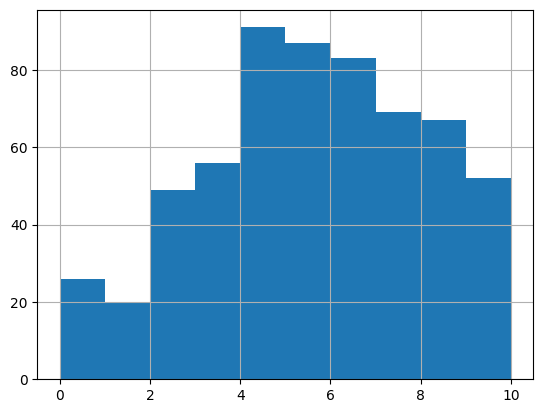

In [10]:
df['nota'].hist()